[Report - Regression on MNIST Dataset](https://medium.com/@codyysb/regression-on-mnist-data-7f3d9bcd58fd)

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def transform_function(array):
    return (array > 0).astype(int)

# Digit 3 -- Ordinary Least Squares

In [ ]:
X, digit = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
y = digit.copy()
y[digit != '3'] = -1
y[digit == '3'] = 1

In [ ]:
sum(y==1), sum(y==-1)

(7141, 62859)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
X.shape, X_test.shape, X_train.shape

((70000, 784), (35000, 784), (35000, 784))

In [ ]:
y.shape, y_test.shape, y_train.shape

((70000,), (35000,), (35000,))

In [ ]:
model_train = sm.OLS(y_train.astype(float), sm.add_constant(X_train.astype(float))).fit()

In [ ]:
model_train.rsquared

0.5339294776650398

In [ ]:
fitted_y_train = model_train.fittedvalues
fitted_y_train

array([-0.98001131, -1.33288749, -0.82549203, ..., -0.87292405,
       -0.96489197, -0.35973667])

In [ ]:
predicted_class_train = np.sign(fitted_y_train)

In [ ]:
model_test = sm.OLS(y_test.astype(float), sm.add_constant(X_test.astype(float))).fit()

In [ ]:
model_test.rsquared

0.5283308107272052

In [ ]:
fitted_y_test = model_test.fittedvalues
fitted_y_test

array([-0.65917629, -0.64043706, -1.43078814, ..., -0.81561634,
       -0.99515113, -0.98329021])

In [ ]:
predicted_class_test = np.sign(fitted_y_test)

In [ ]:
test_score = accuracy_score(transform_function(y_test), transform_function(predicted_class_test))

In [ ]:
train_score = accuracy_score(transform_function(y_train), transform_function(predicted_class_train))

In [ ]:
test_score

0.9585428571428571

In [ ]:
train_score

0.9599142857142857

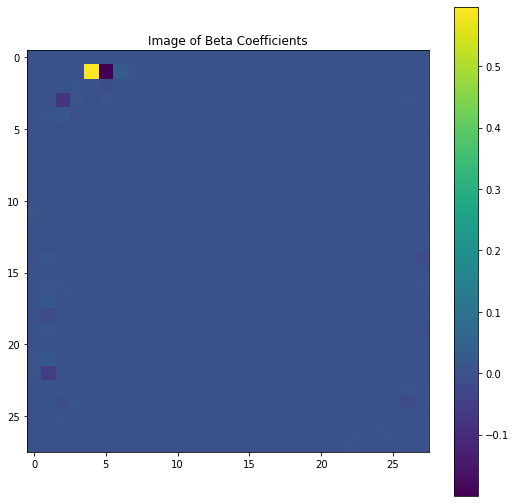

In [ ]:
betas = model_train.params[1:]
B = np.reshape(betas, (28, 28))
B.shape
plt.figure(figsize=(9,9))
plt.title("Image of Beta Coefficients")
plt.imshow(B)
plt.colorbar()
plt.show()

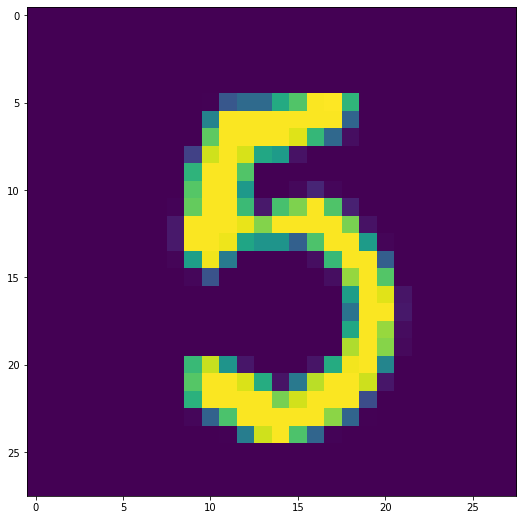

In [ ]:
one_image = np.reshape(X_test[11,0:784], (28, 28))
plt.figure(figsize=(9,9))
plt.imshow(one_image)
plt.show()

In [ ]:
predicted_class_test[11]

-1.0

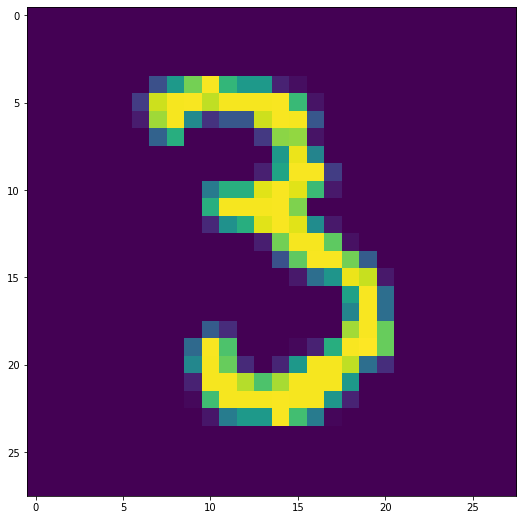

In [ ]:
second_image = np.reshape(X_test[13,0:784], (28, 28))
plt.figure(figsize=(9,9))
plt.imshow(second_image)
plt.show()

In [ ]:
predicted_class_test[13]

1.0

# Confusion Matrices for Digit *3*

In [ ]:
cm_test = metrics.confusion_matrix(transform_function(y_test), transform_function(predicted_class_test))
cm_test

array([[31225,   147],
       [ 1304,  2324]])

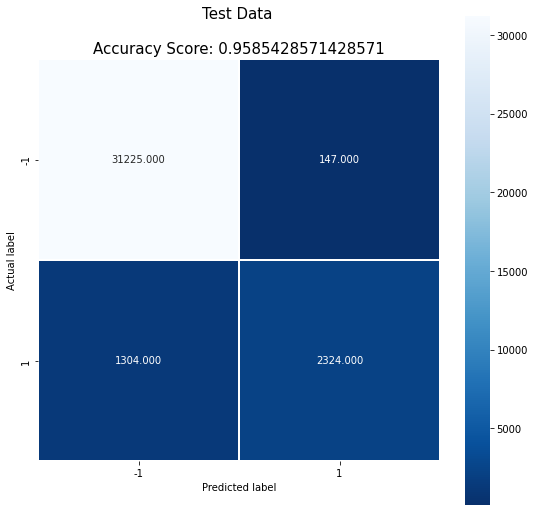

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Data \n\nAccuracy Score: {0}'.format(test_score)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);

In [ ]:
cm_train = metrics.confusion_matrix(transform_function(y_train), transform_function(predicted_class_train))
cm_train

array([[31356,   131],
       [ 1272,  2241]])

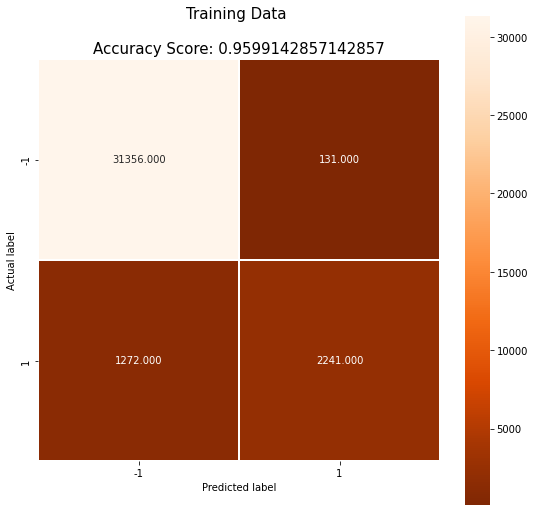

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training Data \n\nAccuracy Score: {0}'.format(train_score)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);
plt.savefig('digit_3_traincm.png')

# Diagnostic Plots

In [ ]:
# This is for diagnostic plots for digit 3

# model residuals
model_residuals = model_train.resid

ss = StandardScaler()
model_norm_residuals = ss.fit_transform(model_residuals.reshape(-1,1))

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_train.get_influence().hat_matrix_diag

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

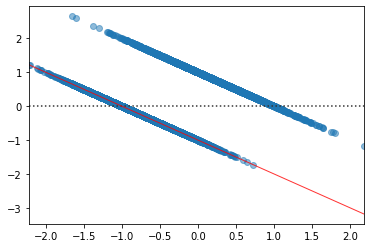

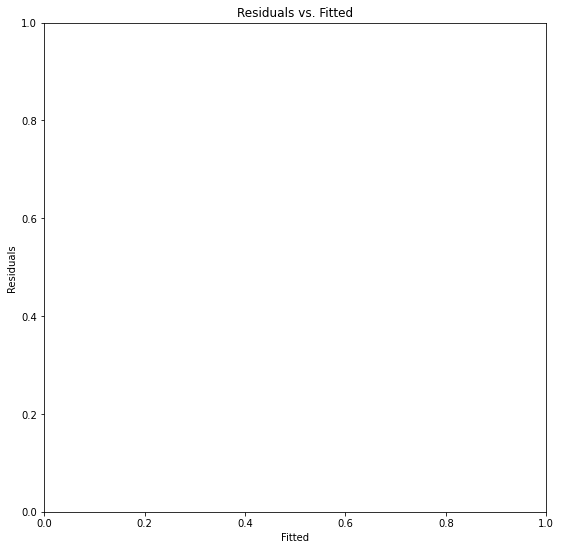

In [ ]:
plt.figure(figsize=(9,9))
sns.residplot(fitted_y_train.astype(float), y_train.astype(float),lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')

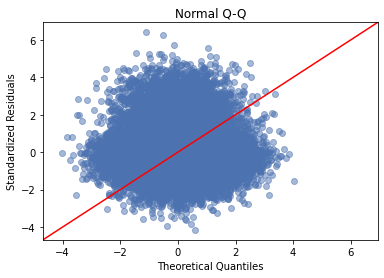

In [ ]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


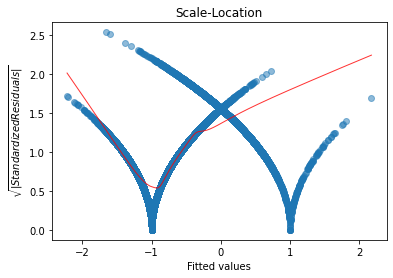

In [ ]:
plot_lm_3 = plt.figure()
plt.scatter(fitted_y_train, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(fitted_y_train, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


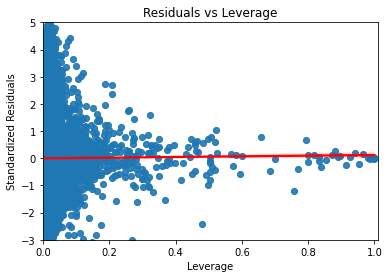

In [ ]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, line_kws={'color': 'red'})
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# Backwards Selection Method

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)
X_train.shape

(7000, 784)

In [ ]:
max_pvalue = 1
count = 1
while max_pvalue > 0.05:
    print("Iteration " + str(count))
    model = sm.OLS(y_train.astype(float), sm.add_constant(X_train.astype(float))).fit()
    pvalues = model.pvalues[1:]
    max_pvalue = np.nanmax(pvalues)

    idx = np.where(model.pvalues == max_pvalue)[0][0] - 1
    X_train = np.delete(X_train, idx, axis = 1)
    count+=1

X_train.shape

Iteration 1


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteration 78
Iterati

(7000, 114)

In [ ]:
X_train

(7000, 114)

# Rerunning model with reduced number of features

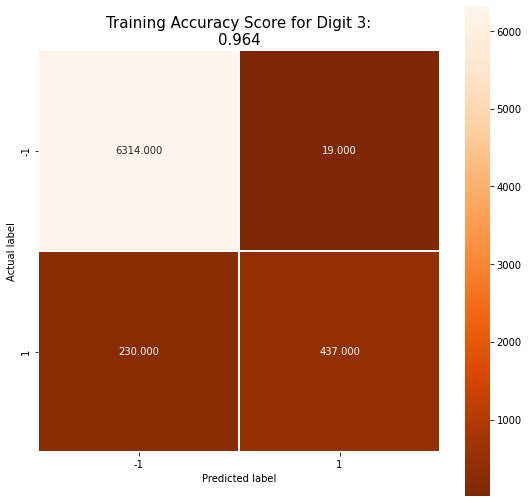

In [ ]:
model_train = sm.OLS(y_train.astype(float), sm.add_constant(X_train.astype(float))).fit()
predicted_class_train = np.sign(model_train.fittedvalues)
train_score = accuracy_score(transform_function(y_train), transform_function(predicted_class_train))
cm_train = metrics.confusion_matrix(transform_function(y_train), transform_function(predicted_class_train))

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges_r', ax=ax);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = "Training Accuracy Score for Digit 3:\n" + str(round(train_score, 3)) 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '-1'
labels[1] = '1'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title(all_sample_title, size = 15);
plt.savefig('digit_3_traincm.png')

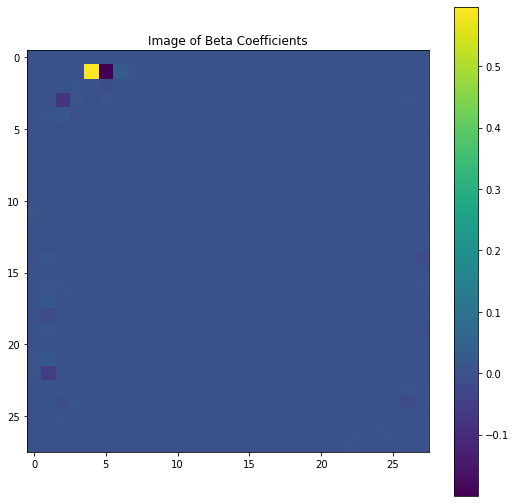

In [ ]:
betas_2 = model_train.params[1:]
B2 = np.reshape(betas, (28, 28))
B2.shape
plt.figure(figsize=(9,9))
plt.title("Image of Beta Coefficients")
plt.imshow(B2)
plt.colorbar()
plt.show()

# Running OLS for all digits

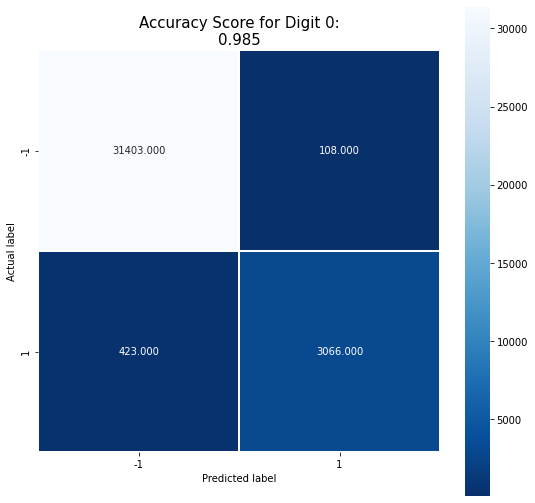

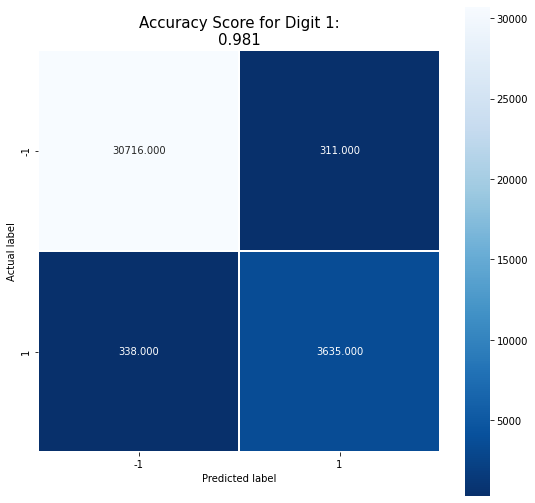

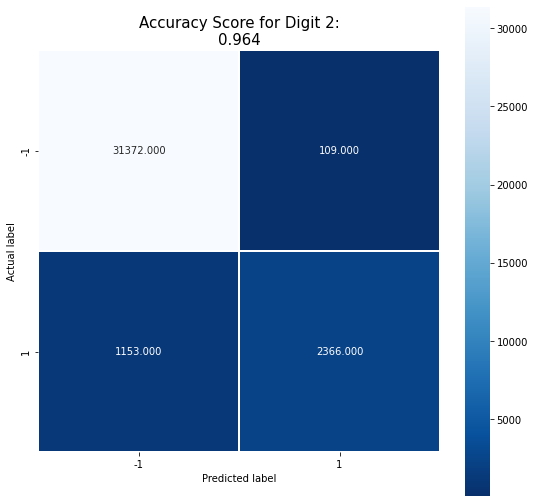

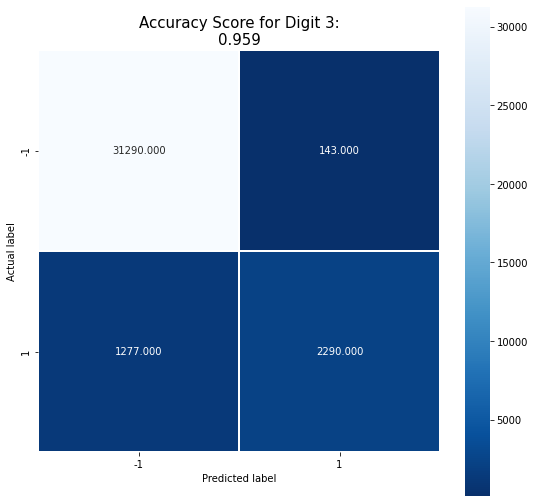

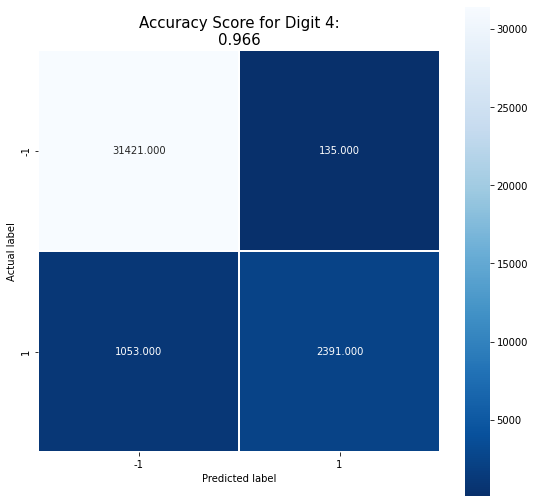

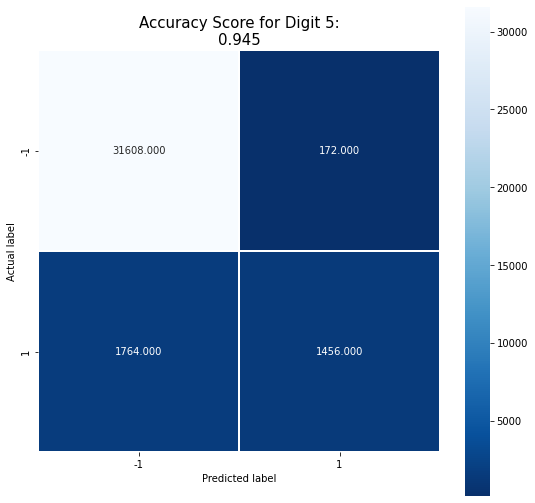

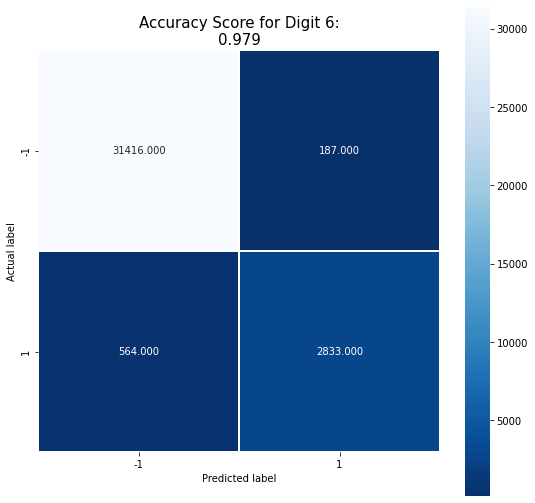

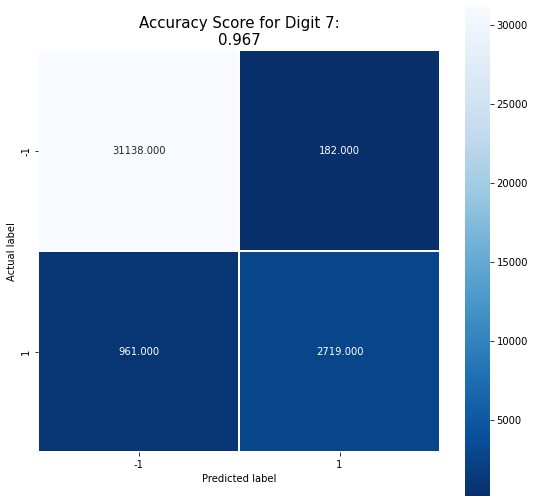

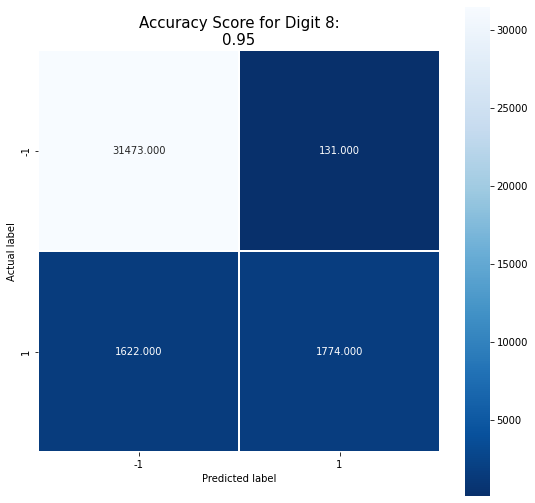

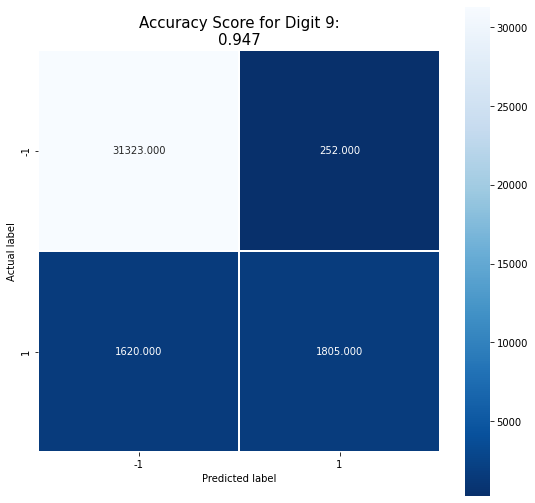

In [ ]:
for i in range(10):
    y = digit.copy()
    y[digit != str(i)] = -1
    y[digit == str(i)] = 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    model_test = sm.OLS(y_test.astype(float), sm.add_constant(X_test.astype(float))).fit()
    predicted_class_test = np.sign(model_test.fittedvalues)
    test_score = accuracy_score(transform_function(y_test), transform_function(predicted_class_test))
    cm_test = metrics.confusion_matrix(transform_function(y_test), transform_function(predicted_class_test))

    fig, ax = plt.subplots(figsize=(9,9))
    sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = "Accuracy Score for Digit " + str(i) + ":\n" + str(round(test_score, 3)) 
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = '-1'
    labels[1] = '1'
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.title(all_sample_title, size = 15);
    plt.savefig('digit_' + str(i) + '_testcm.png')

# Logistic Regression

In [ ]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
# Make an instance of the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)

# Divide pixel values by 255 before running regression
train_X = train_X / 255
test_X = test_X / 255

# Transform test and training data from 3d to 2d
nsamples, nx, ny = train_X.shape
d2_train_X = train_X.reshape((nsamples, nx*ny))

nsamples, nx, ny = test_X.shape
d2_test_X = test_X.reshape((nsamples, nx*ny))

# Fit model to training data
log_reg.fit(d2_train_X, train_y)

# Predict using test data
predictions = log_reg.predict(d2_test_X)

# Compute confusion matrix
cm = metrics.confusion_matrix(test_y, predictions)

# Calculate accuracy score of the model 
score = accuracy_score(test_y, predictions)
print("Model Accuracy Score: " + str(score*100) + "%")

Model Accuracy Score: 92.56%


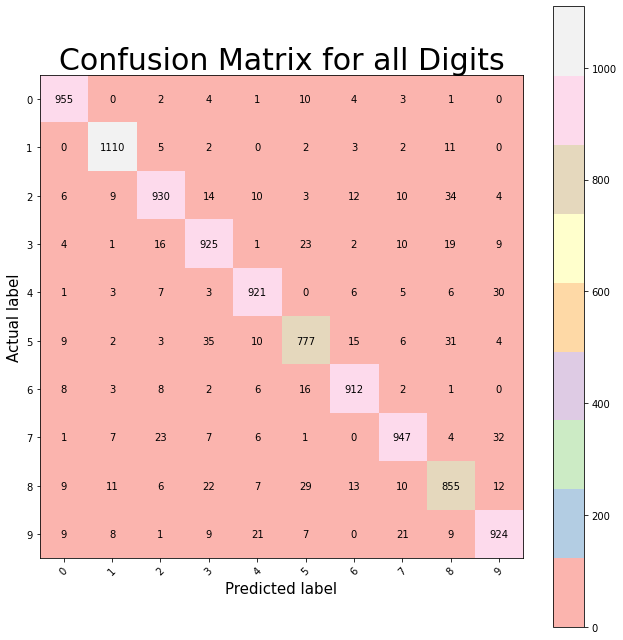

In [ ]:
# This is a confusion matrix for test data using EVERY digit

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix for all Digits', size = 30)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [ ]:
combinations = {}

# Create 2D matrix of zeros
total_errors = [[0] * 10 for _ in range(10)]
train_errors = [[0] * 10 for _ in range(10)]
test_errors = [[0] * 10 for _ in range(10)]

for i in range(10):
  for j in range(i+1, 10):
    log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)

    print(i, j)

    training_mask = np.logical_or(train_y == i, train_y == j)
    combinations["digit{0}_{1}_X_train".format(i, j)] = np.delete(d2_train_X, [idx for idx, element in enumerate(training_mask) if not element], axis=0)
    combinations["digit{0}_{1}_y_train".format(i, j)] = train_y[training_mask]

    testing_mask = np.logical_or(test_y == i, test_y == j)
    combinations["digit{0}_{1}_X_test".format(i, j)] = np.delete(d2_test_X, [idx for idx, element in enumerate(testing_mask) if not element], axis=0)
    combinations["digit{0}_{1}_y_test".format(i, j)] = test_y[testing_mask]
    log_reg.fit(combinations["digit{0}_{1}_X_train".format(i, j)], combinations["digit{0}_{1}_y_train".format(i, j)])

    train_prediction = log_reg.predict(combinations["digit{0}_{1}_X_train".format(i, j)])
    train_score = accuracy_score(combinations["digit{0}_{1}_y_train".format(i, j)], train_prediction)

    test_prediction = log_reg.predict(combinations["digit{0}_{1}_X_test".format(i, j)])
    test_score = accuracy_score(combinations["digit{0}_{1}_y_test".format(i, j)], test_prediction)

    total_errors[i][j] = train_score
    total_errors[j][i] = test_score

    train_errors[i][j] = train_score
    test_errors[j][i] = test_score

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 4
3 5
3 6
3 7
3 8
3 9
4 5
4 6
4 7
4 8
4 9
5 6
5 7
5 8
5 9
6 7
6 8
6 9
7 8
7 9
8 9


In [ ]:
train_errors_2 = pd.DataFrame(train_errors)
train_errors_2.replace(0, np.nan, inplace=True)

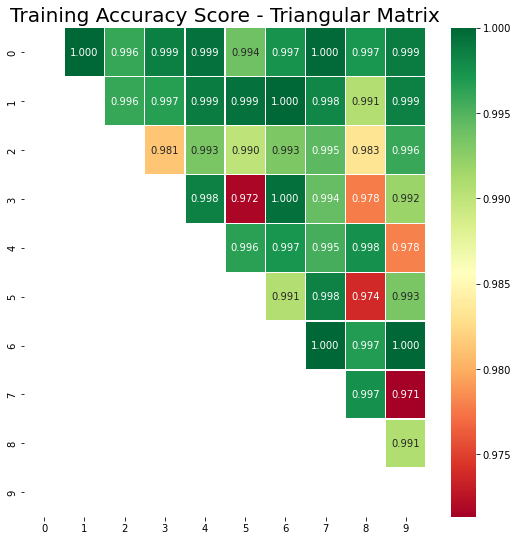

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(train_errors_2, cmap ='RdYlGn', linewidths = 0.30, fmt='.3f', annot = True)
plt.title("Training Accuracy Score - Triangular Matrix", size = 20);

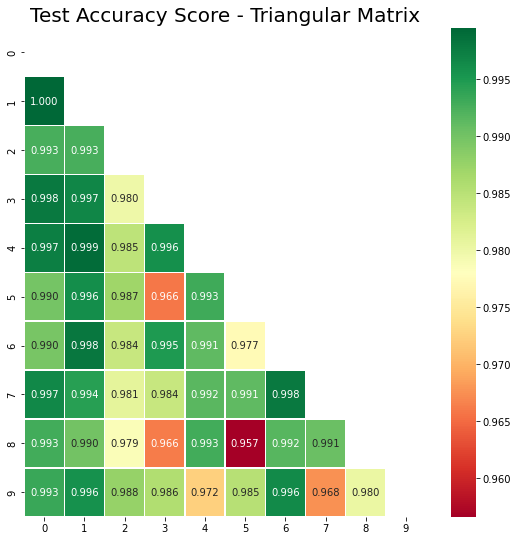

In [ ]:
test_errors_2 = pd.DataFrame(test_errors)
test_errors_2.replace(0, np.nan, inplace=True)
plt.figure(figsize=(9,9))
sns.heatmap(test_errors_2, cmap ='RdYlGn', linewidths = 0.30, fmt='.3f', annot = True)
plt.title("Test Accuracy Score - Triangular Matrix", size = 20);